# Main Code 

## 2D (optional: query points)

In [1]:
from Test_Funcs import egg,hartmann,branin
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import pickle
from plotting_utilities import *
import numpy as np

In [2]:
savefile = False

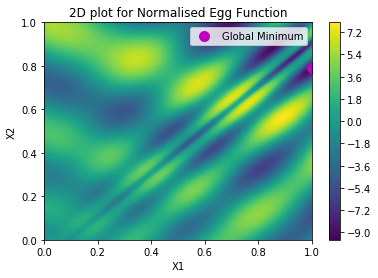

<Figure size 432x288 with 0 Axes>

In [3]:
funcs = {
    "branin": branin,
    "egg": egg,
    "hartmann": hartmann
}

# Minimum y value
min_y_dict = {
    "hartmann": np.array([-18.22368011]),
    "egg": np.array([-9.596407]),
    "branin": np.array([-14.96021125])
}

# Minimiser x value
min_x_dict = {
    "hartmann": np.array([[0.20169, 0.150011, 0.476874, 0.275332, 0.311652, 0.6573]]),
    "egg": np.array([[1.0, 0.7895]]),
    "branin": np.array([[0.1239, 0.8183],[0.5428, 0.1517],[0.9617, 0.1650]])
}

# Dimensions
dim_dict = {
    "hartmann": 6,
    "egg": 2,
    "branin": 2    
}

graph_title3 = {
    "egg": "3D plot for Normalised Egg Function",
    "branin": "3D plot for Normalised Branin Function"
}

graph_title = {
    "egg": "2D plot for Normalised Egg Function",
    "branin": "2D plot for Normalised Branin Function"
}

def plot_contour_2d(selected_func, past_x = np.array([]), no_queries = 20, 
                   past_x_opt = np.array([])):
    """ 
    Plots and saves 2d plots
    Past_x and no_queries: plots query record
    """
    x_min = min_x_dict[selected_func]
    func = funcs[selected_func]
    
    x1 = np.linspace(0.0, 1.0, 100)
    x2 = np.linspace(0.0, 1.0, 100)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.hstack((X1.reshape(100*100,1),X2.reshape(100*100,1)))
    Y = func(X)
    
    plt.figure()    
    plt.contourf(X1, X2, Y.reshape((100,100)),100)
    if (len(x_min)>1):    
        plt.plot(np.array(x_min)[:,0], np.array(x_min)[:,1], 'm.', markersize=20, label='Global Minimums')
    else:
        plt.plot(x_min[0][0], x_min[0][1], 'm.', markersize=20, label='Global Minimum')
    plt.legend()
    plt.colorbar()
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(graph_title[selected_func])
    
    # History of query - labelled with TRIANGLE
    if past_x.shape != (0,): # Means we have query record
        lons = past_x[:no_queries,0]
        lats = past_x[:no_queries,1]
        vals = np.arange(lons.shape[0])
        plt.scatter(lons, lats, marker = '^', c=vals, cmap='afmhot', )  
        plt.colorbar()
        savepath = "Exp_Data/Graphs/2d_queries_" + selected_func + ".png"
    else:
        savepath = "Exp_Data/Graphs/2d_contour_" + selected_func + ".png"
    
    # History of x_opt guess - labelled with cross
    if past_x.shape != (0,): # Means we have query record
        lons = past_x_opt[:no_queries,0]
        lats = past_x_opt[:no_queries,1]
        vals = np.arange(lons.shape[0])
        plt.scatter(lons, lats, marker = '+', c=vals, cmap='afmhot', )  
        plt.colorbar()
        savepath = "Exp_Data/Graphs/2d_x-opt_" + selected_func + ".png"

        
    plt.show()
    plt.savefig(savepath)
    
plot_contour_2d("egg")

# Showing historical 

In [12]:
def load_pickle_x(seed_size, seed, func, batch, heuristic, batch_size):
    """ 
    Loads past querie, excluding initial points
    Returns array of x1 and x2
    """
    loaded_x = load_pickle(seed_size, seed, func, batch, heuristic, batch_size, "X")
    if func == "hartmann":
        init_x = 6
    else:
        init_x = 3
    
    x = loaded_x[3:,:]

    return x

def load_pickle_x_opt(seed_size, seed, func, batch, heuristic, batch_size):
    """
    Loads past guesses of optimal x location
    """
    metrics = "X-opt"
    df  = error_vs_iterations_v2(func = func, seed_size = seed_size, metrics = metrics, batch = batch,
                                batch_size = batch_size, heuristic = heuristic)
    print(df)
    df_seed = df[df["seed"] == seed]
    
    x_opt = df_seed["values"].values # values turn pd.Series into array
    return x_opt
    

IndexError: too many indices for array

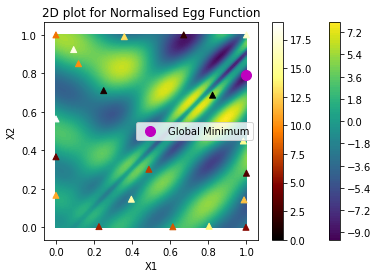

In [5]:
selected_func = "egg"

for i in range(5):
    past_x = load_pickle_x(seed_size = 30, seed = i, func = selected_func, batch = False, heuristic = "cl-min", batch_size = 2)
    plot_contour_2d(selected_func, past_x, 20)

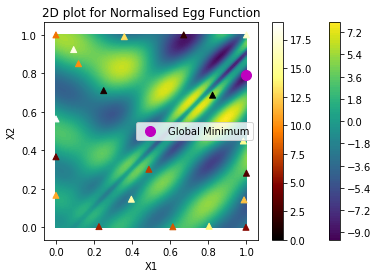

In [6]:
selected_func = "egg"
x_min = min_x_dict[selected_func]
func = funcs[selected_func]

x1 = np.linspace(0.0, 1.0, 100)
x2 = np.linspace(0.0, 1.0, 100)
X1, X2 = np.meshgrid(x1, x2)
X = np.hstack((X1.reshape(100*100,1),X2.reshape(100*100,1)))
Y = func(X)

plt.figure()    
plt.contourf(X1, X2, Y.reshape((100,100)),100)
if (len(x_min)>1):    
    plt.plot(np.array(x_min)[:,0], np.array(x_min)[:,1], 'm.', markersize=20, label='Global Minimums')
else:
    plt.plot(x_min[0][0], x_min[0][1], 'm.', markersize=20, label='Global Minimum')
plt.legend()
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(graph_title[selected_func])

no_queries = 20
lons = past_x[:no_queries,0]
lats = past_x[:no_queries,1]
vals = np.arange(lons.shape[0])
plt.scatter(lons, lats, marker = '^', c=vals, cmap='afmhot', )  
plt.colorbar()


In [24]:
past_x

array([[0.        , 1.        ],
       [0.5229992 , 1.        ],
       [0.85852152, 0.38009518],
       [0.        , 0.        ],
       [0.        , 0.63690859],
       [0.48343264, 0.61320908],
       [0.        , 0.33297451],
       [1.        , 0.        ],
       [0.49032466, 0.00348047],
       [0.25610937, 0.9997097 ],
       [0.26456374, 0.1867521 ],
       [0.03237775, 0.83866956],
       [0.25875343, 0.46845223],
       [1.        , 1.        ],
       [0.78739713, 0.85443537],
       [1.        , 0.13644994],
       [0.71648261, 0.57220613],
       [0.45399022, 0.84198195],
       [0.13087818, 0.99482986],
       [0.48312464, 0.72461624],
       [0.72921685, 0.99145717],
       [0.59806303, 0.6140924 ],
       [0.79820809, 0.        ],
       [0.12880475, 0.37185374],
       [0.40974389, 0.31129219],
       [0.84145124, 0.59405011],
       [0.00837455, 0.16755281],
       [0.2438465 , 0.        ],
       [0.24170182, 0.71376074],
       [0.56919413, 0.34409201],
       [0.